In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [5]:
scaler = StandardScaler()

X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_std)

# 1. Split the data randomly into two and apply k-means using two, three and four as the number of clusters as we did in our discussion of the consistency in this checkpoint. Assess the consistency of the solutions using visualization. Which one does seem to be the best one?

In [6]:
X_stdhalf1, X_stdhalf2, X_pcahalf1, X_pcahalf2 = train_test_split(X_std, X_pca, test_size=.5, random_state=200)

In [7]:
k_means1 = KMeans(n_clusters=2, random_state=200)
k_means1.fit(X_stdhalf1)
y_preds1 = k_means1.predict(X_stdhalf1)

k_means2 = KMeans(n_clusters=2, random_state=200)
k_means2.fit(X_stdhalf2)
y_preds2 = k_means2.predict(X_stdhalf2)

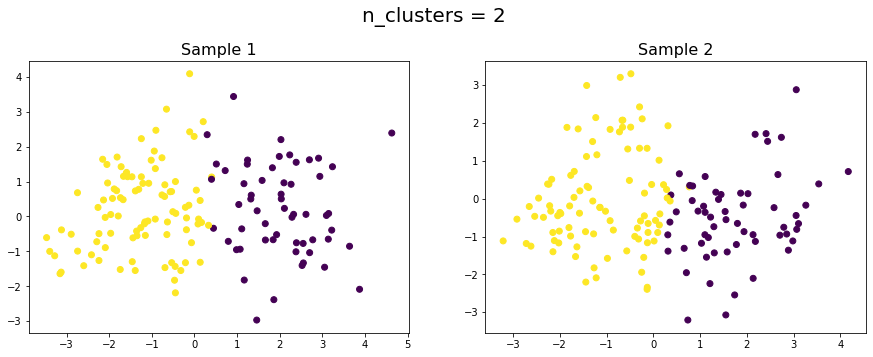

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(x=X_pcahalf1[:,0], y=X_pcahalf1[:,1], c=y_preds1)
plt.title('Sample 1', fontsize=16)

plt.subplot(1,2,2)
plt.scatter(x=X_pcahalf2[:,0], y=X_pcahalf2[:,1], c=y_preds2)
plt.title('Sample 2', fontsize=16)

plt.suptitle('n_clusters = 2', fontsize=20, y=1.03)
plt.show()

2 clusters seems to be consistent among both samples and is the best.

In [9]:
k_means1 = KMeans(n_clusters=3, random_state=200)
k_means1.fit(X_stdhalf1)
y_preds1 = k_means1.predict(X_stdhalf1)

k_means2 = KMeans(n_clusters=3, random_state=200)
k_means2.fit(X_stdhalf2)
y_preds2 = k_means2.predict(X_stdhalf2)

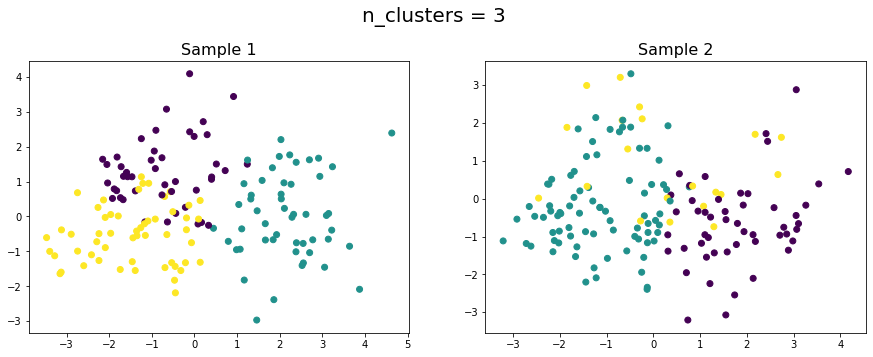

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(x=X_pcahalf1[:,0], y=X_pcahalf1[:,1], c=y_preds1)
plt.title('Sample 1', fontsize=16)

plt.subplot(1,2,2)
plt.scatter(x=X_pcahalf2[:,0], y=X_pcahalf2[:,1], c=y_preds2)
plt.title('Sample 2', fontsize=16)

plt.suptitle('n_clusters = 3', fontsize=20, y=1.03)
plt.show()

Both samples are not cosistent with 3 clusters.

In [11]:
k_means1 = KMeans(n_clusters=4, random_state=200)
k_means1.fit(X_stdhalf1)
y_preds1 = k_means1.predict(X_stdhalf1)

k_means2 = KMeans(n_clusters=4, random_state=200)
k_means2.fit(X_stdhalf2)
y_preds2 = k_means2.predict(X_stdhalf2)

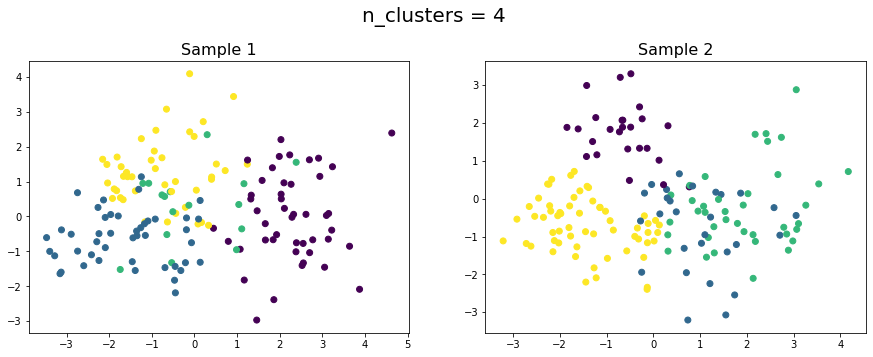

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(x=X_pcahalf1[:,0], y=X_pcahalf1[:,1], c=y_preds1)
plt.title('Sample 1', fontsize=16)

plt.subplot(1,2,2)
plt.scatter(x=X_pcahalf2[:,0], y=X_pcahalf2[:,1], c=y_preds2)
plt.title('Sample 2', fontsize=16)

plt.suptitle('n_clusters = 4', fontsize=20, y=1.03)
plt.show()

Both samples are not cosistent with 4 clusters.

# 2. Apply k-means on the whole dataset by setting k is equal two, three and four and get ARI score for each of them. Which model is the best?

In [13]:
from sklearn import metrics

In [18]:
k_means = KMeans(n_clusters=2, random_state=200)
k_means.fit(X_std)
y_preds = k_means.predict(X_std)
print('ARI score for n_clusters=2 : {}'.format(metrics.adjusted_rand_score(y, y_preds)))

k_means = KMeans(n_clusters=3, random_state=200)
k_means.fit(X_std)
y_preds = k_means.predict(X_std)
print('ARI score for n_clusters=3 : {}'.format(metrics.adjusted_rand_score(y, y_preds)))

k_means = KMeans(n_clusters=4, random_state=200)
k_means.fit(X_std)
y_preds = k_means.predict(X_std)
print('ARI score for n_clusters=4 : {}'.format(metrics.adjusted_rand_score(y, y_preds)))

ARI score for n_clusters=2 : 0.4380857727169879
ARI score for n_clusters=3 : 0.2740064669723646
ARI score for n_clusters=4 : 0.1978828661341538


The 2 cluster model gave the best ARI score.

# 3. Apply k-means on the whole dataset by setting k is equal two, three and four and get silhouette coefficient for each of them. Which model is the best?

In [20]:
k_means = KMeans(n_clusters=2, random_state=200)
k_means.fit(X_std)
y_preds = k_means.predict(X_std)
print('Silhouette coefficient for n_clusters=2 : {}'.format(metrics.silhouette_score(X_std, y_preds, metric='euclidean')))

k_means = KMeans(n_clusters=3, random_state=200)
k_means.fit(X_std)
y_preds = k_means.predict(X_std)
print('Silhouette coefficient for n_clusters=3 : {}'.format(metrics.silhouette_score(X_std, y_preds, metric='euclidean')))

k_means = KMeans(n_clusters=4, random_state=200)
k_means.fit(X_std)
y_preds = k_means.predict(X_std)
print('Silhouette coefficient for n_clusters=4 : {}'.format(metrics.silhouette_score(X_std, y_preds, metric='euclidean')))

Silhouette coefficient for n_clusters=2 : 0.17530682286260937
Silhouette coefficient for n_clusters=3 : 0.1299061055112915
Silhouette coefficient for n_clusters=4 : 0.13254459267002072


The 2 cluster model gave the best silhouette score.